<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [7]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 154.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 193.5 MB/s eta 0:00:00


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 162.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 132.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 149.3 MB/s eta 0:00:00


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [3]:
#Check to see if all of the columns are there or not
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [4]:
# Count missing values in each column and sort in descending order
missing_values = df.isnull().sum().sort_values(ascending=False)

# Display the result
print("Missing values per column:")
print(missing_values)

Missing values per column:
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
MainBranch                        0
Age                               0
Employment                        0
Check                             0
ResponseId                        0
Length: 114, dtype: int64


In [8]:
#Clean data using same code block as previous labs
# Step 3: Clean and Prepare the Data

# Remove duplicates based on key identifying columns
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]
df_cleaned = df.drop_duplicates(subset=subset_cols)

# Drop unnecessary columns
cols_to_drop = ['Respondent', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith']
df_cleaned = df_cleaned.drop(columns=cols_to_drop, errors='ignore')

# Impute missing values
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')
df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)

edlevel_mode = df_cleaned['EdLevel'].mode(dropna=True)[0]
df_cleaned['EdLevel'].fillna(edlevel_mode, inplace=True)

remotework_mode = df_cleaned['RemoteWork'].mode(dropna=True)[0]
df_cleaned['RemoteWork'].fillna(remotework_mode, inplace=True)

# Filter for regression (below 75th percentile in both columns)
q3_comptotal = df_cleaned['CompTotal'].quantile(0.75)
q3_converted = df_cleaned['ConvertedCompYearly'].quantile(0.75)

filtered_df = df_cleaned[
    (df_cleaned['CompTotal'] <= q3_comptotal) &
    (df_cleaned['ConvertedCompYearly'] <= q3_converted)
]

# Fit regression model: CompTotal → ConvertedCompYearly
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

regression_df = filtered_df[['CompTotal', 'ConvertedCompYearly']].dropna()
X_train = regression_df['CompTotal'].values.reshape(-1, 1)
y_train = regression_df['ConvertedCompYearly'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)

# Display regression info used for imputation
print("Regression model used to impute ConvertedCompYearly:")
print(f"  Slope     = {model.coef_[0][0]:.4f}")
print(f"  Intercept = {model.intercept_[0]:.2f}")
print(f"  R² Score  = {r2:.4f}")

# Fill missing ConvertedCompYearly values using the model
missing_mask = df_cleaned['ConvertedCompYearly'].isnull() & df_cleaned['CompTotal'].notnull()
predicted_values = model.predict(df_cleaned.loc[missing_mask, 'CompTotal'].values.reshape(-1, 1))
df_cleaned.loc[missing_mask, 'ConvertedCompYearly'] = predicted_values.flatten()

/tmp/ipykernel_300/360217573.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)
/tmp/ipykernel_300/360217573.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

Regression model used to impute ConvertedCompYearly:
  Slope     = 0.2738
  Intercept = 34606.32
  R² Score  = 0.1524


In [10]:
# Cap ConvertedCompYearly at the 99th percentile to remove outliers
cap = df_cleaned['ConvertedCompYearly'].quantile(0.99)
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].clip(upper=cap)

In [11]:
df_cleaned.describe()

,ResponseId,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,60584.000000,60584.000000,3.297000e+04,29047.000000,28731.000000,28797.000000,28815.000000,28854.000000,28851.000000,28861.000000,28859.000000,28853.000000,28848.000000,3.297000e+04,28532.000000
mean,31167.207266,10.212135,3.033060e+145,11.536544,18.600606,7.555171,10.057535,24.344395,23.006094,20.287191,16.206896,10.960689,9.947137,1.160236e+05,6.935371
std,18352.019590,8.045465,5.507323e+147,9.210789,25.954250,18.449774,21.809882,27.077480,27.025228,26.102012,24.869127,22.908718,21.758149,2.378099e+05,2.090323
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,15308.750000,5.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.296200e+04,6.000000
50%,30806.500000,8.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.476200e+04,7.000000
75%,46640.250000,13.000000,2.500000e+05,16.000000,23.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.074060e+05,8.000000
max,65436.000000,50.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.028369e+06,10.000000


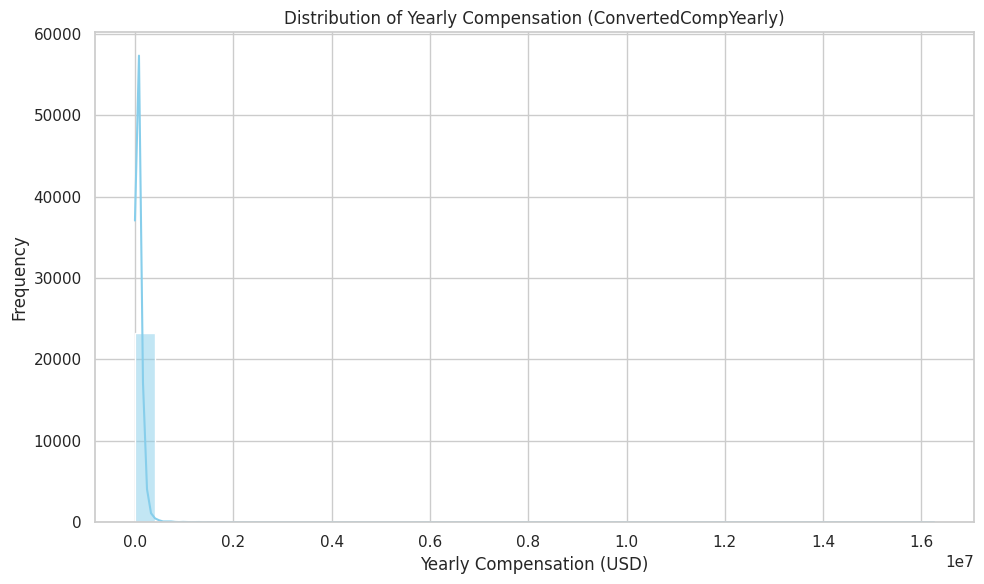

In [12]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histogram and KDE for ConvertedCompYearly
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], kde=True, bins=40, color='skyblue')

plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


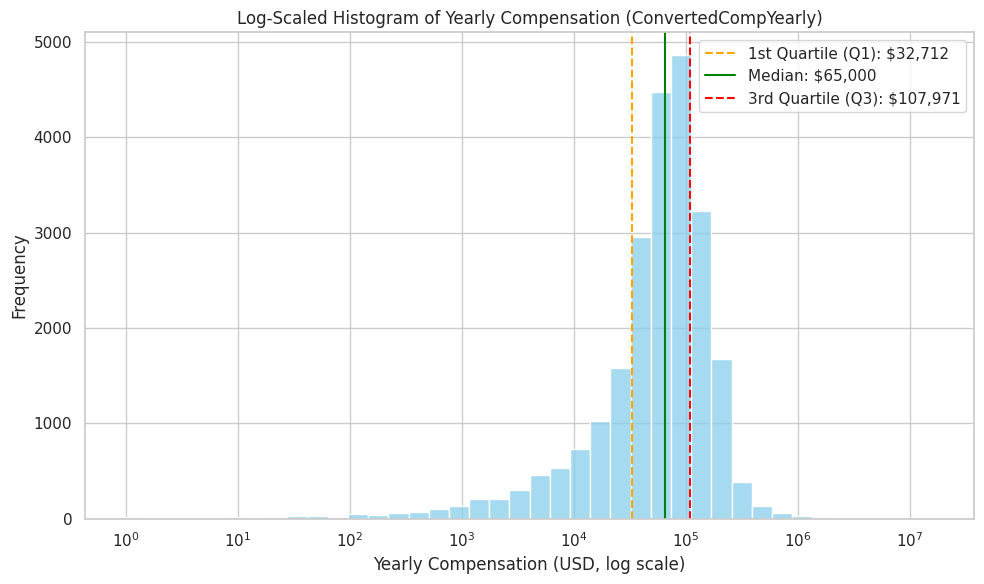

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out invalid values (log scale can't have zero or negative)
valid_comp = df['ConvertedCompYearly'][df['ConvertedCompYearly'] > 0]

# Compute quartiles from the filtered data
q1 = valid_comp.quantile(0.25)
median = valid_comp.median()
q3 = valid_comp.quantile(0.75)

# Plot with correct log binning
plt.figure(figsize=(10, 6))
sns.histplot(valid_comp, bins=40, log_scale=(True, False), color='skyblue')

# Add vertical lines for quartiles
plt.axvline(q1, color='orange', linestyle='--', label=f'1st Quartile (Q1): ${int(q1):,}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: ${int(median):,}')
plt.axvline(q3, color='red', linestyle='--', label=f'3rd Quartile (Q3): ${int(q3):,}')

# Axis labels and title
plt.title('Log-Scaled Histogram of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD, log scale)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [16]:
## Write your code here
# Filter for full-time employed respondents
full_time = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_full_time_comp = full_time['ConvertedCompYearly'].median()

print(f"Median Yearly Compensation for Full-Time Employees: ${int(median_full_time_comp):,}")


Median Yearly Compensation for Full-Time Employees: $69,814


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [18]:
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Palestinian Territory': 'Palestine',
    'Micronesia, Federated States of...': 'Micronesia',
    'Congo, Republic of the...': 'Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bosnia and Herzegovina': 'Bosnia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Bolivia, Plurinational State of...': 'Bolivia'
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

# Optional: fill in missing values
df['Country'] = df['Country'].fillna('Unknown')

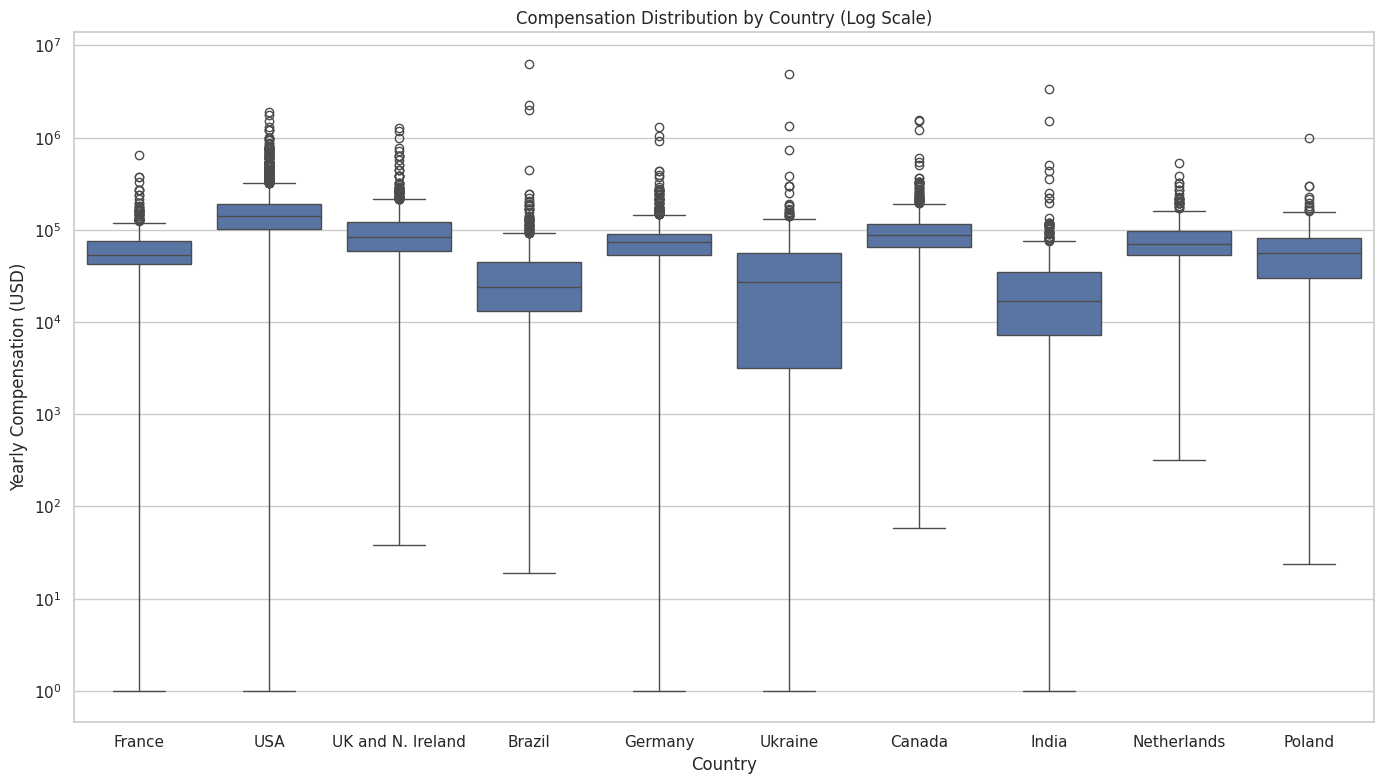

In [21]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to remove missing values and keep positive compensation only
valid_data = df[(df['ConvertedCompYearly'] > 0) & (df['Country'].notnull())]

# Set a figure size
plt.figure(figsize=(14, 8))

# Plot boxplot grouped by country (you can limit to top N countries if too many)
top_countries = valid_data['Country'].value_counts().head(10).index
filtered = valid_data[valid_data['Country'].isin(top_countries)]

# Create box plot
sns.boxplot(x='Country', y='ConvertedCompYearly', data=filtered)
plt.yscale('log')  # Optional: log scale for readability
plt.xticks(rotation=0)
plt.title('Compensation Distribution by Country (Log Scale)')
plt.ylabel('Yearly Compensation (USD)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [22]:
## Write your code here
# Compute IQR bounds
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)  # Clamp to 0
upper_bound = q3 + 1.5 * iqr

# Remove outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Dataset size after outlier removal: {df_no_outliers.shape}")


Dataset size after outlier removal: (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


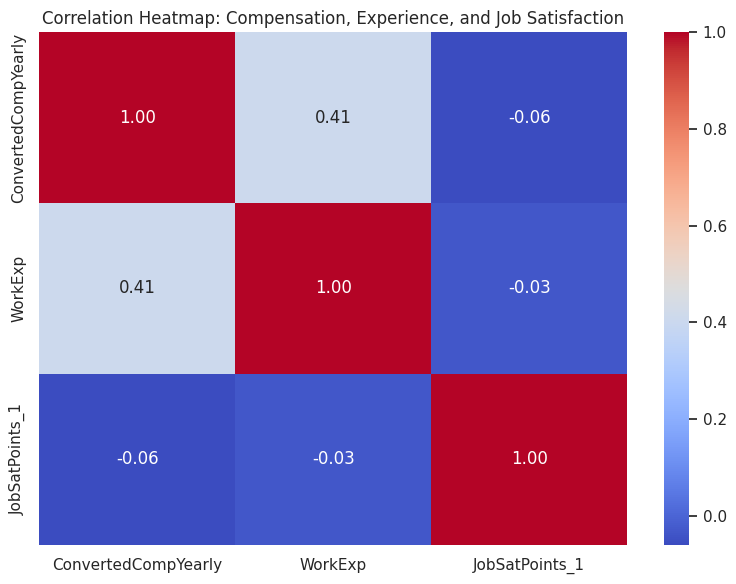

In [24]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Subset relevant numeric columns
corr_columns = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
corr_df = df_no_outliers[corr_columns].dropna()

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Compensation, Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


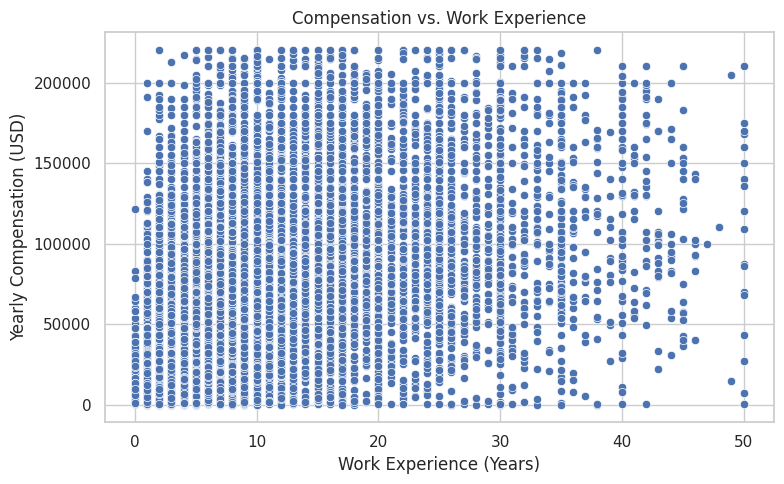

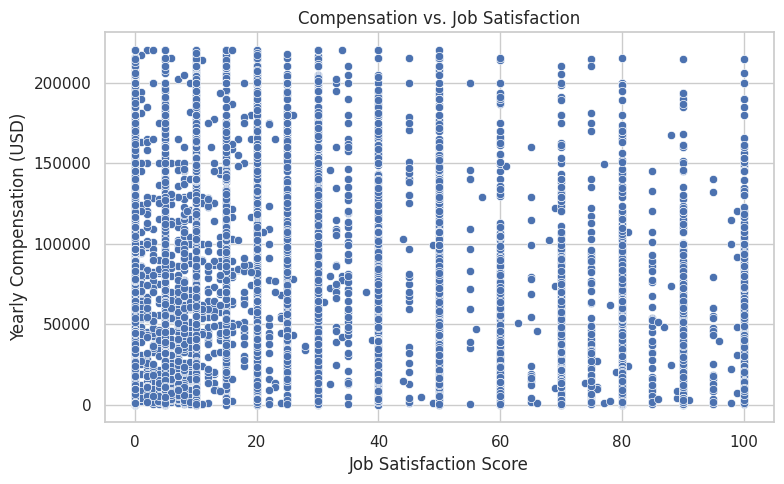

In [26]:
## Write your code here
# Scatter: Compensation vs. Work Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(data=corr_df, x='WorkExp', y='ConvertedCompYearly')
plt.title('Compensation vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()

# Scatter: Compensation vs. Job Satisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(data=corr_df, x='JobSatPoints_1', y='ConvertedCompYearly')
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()


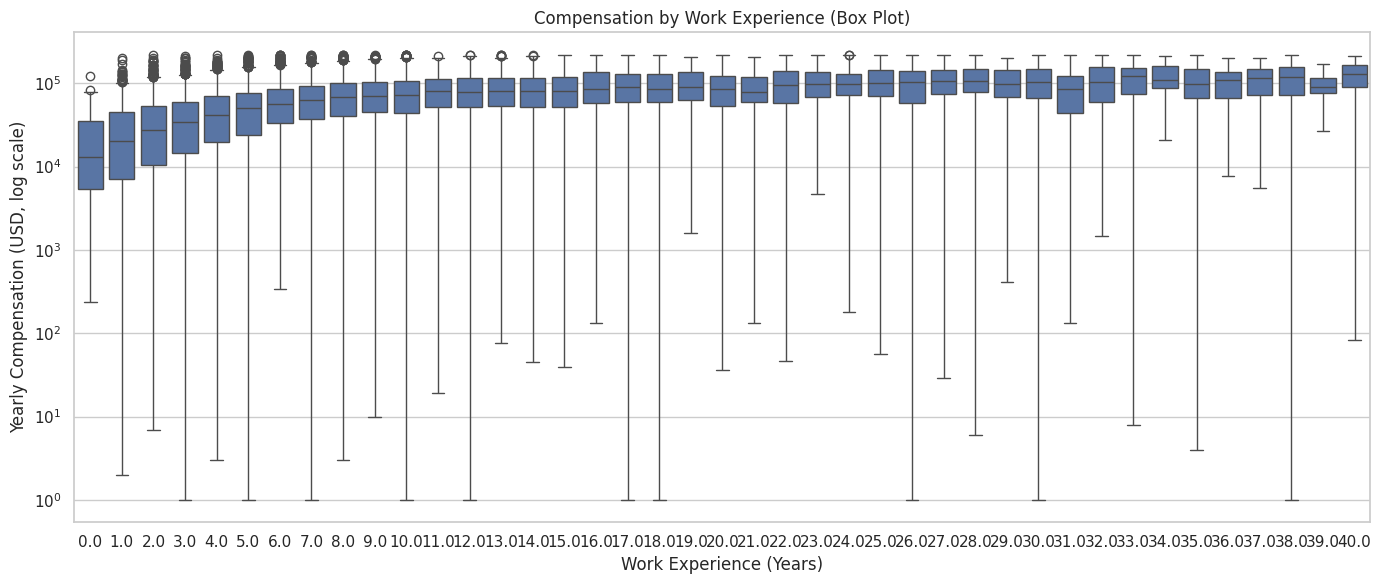

In [27]:
#Alternative visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: limit experience range for readability
subset = df_no_outliers[df_no_outliers['WorkExp'] <= 40]

plt.figure(figsize=(14, 6))
sns.boxplot(data=subset, x='WorkExp', y='ConvertedCompYearly')
plt.yscale('log')  # Optional: makes spread more visible
plt.title('Compensation by Work Experience (Box Plot)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD, log scale)')
plt.tight_layout()
plt.show()


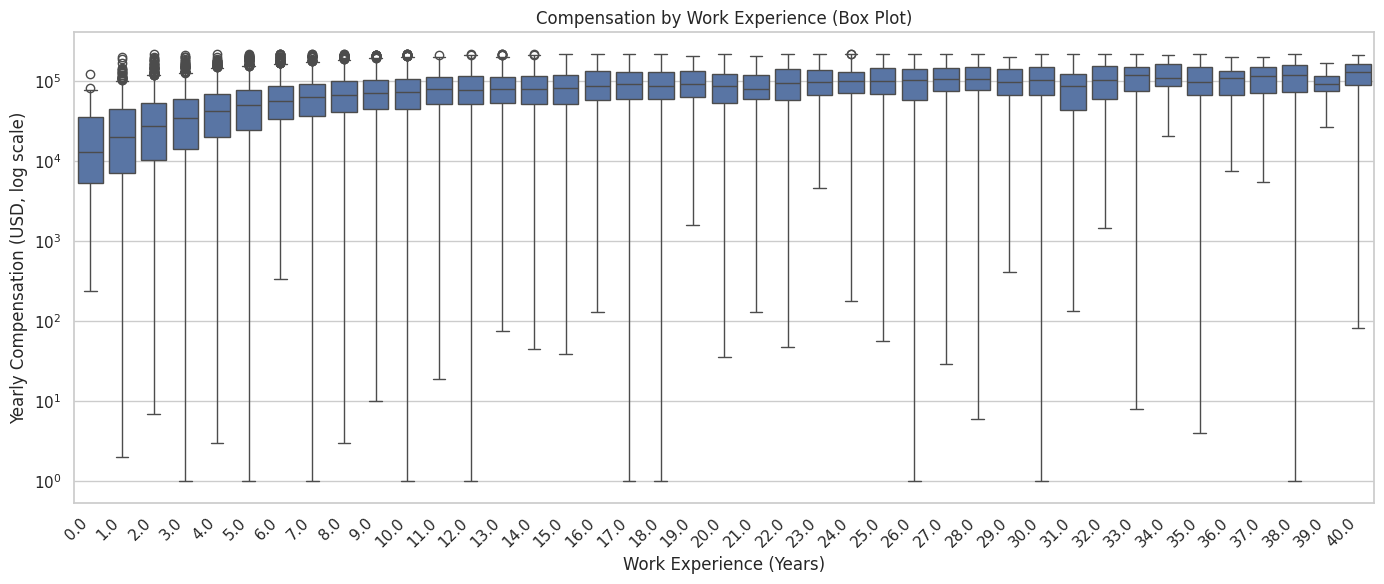

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limit to 40 years of experience for readability
subset = df_no_outliers[df_no_outliers['WorkExp'] <= 40]

plt.figure(figsize=(14, 6))
sns.boxplot(data=subset, x='WorkExp', y='ConvertedCompYearly')

plt.yscale('log')
plt.title('Compensation by Work Experience (Box Plot)')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD, log scale)')

# Clean up x-axis labels
plt.xticks(rotation=45, ha='right')  # angle and alignment
plt.tight_layout()
plt.show()


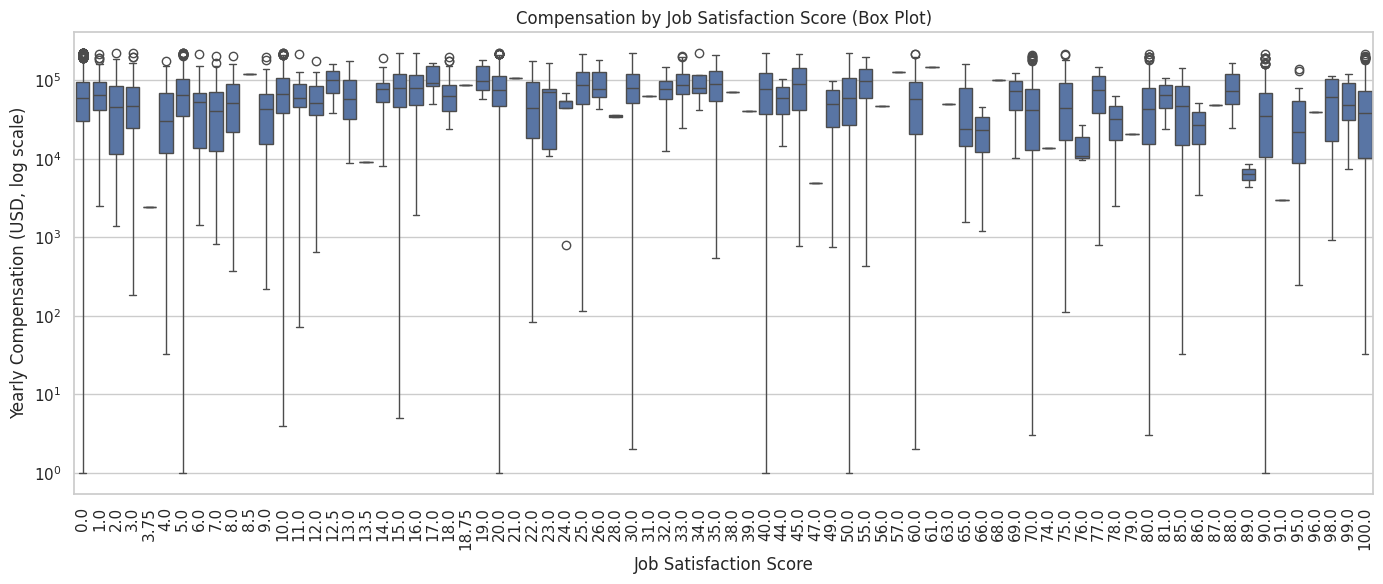

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_no_outliers, x='JobSatPoints_1', y='ConvertedCompYearly')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Compensation by Job Satisfaction Score (Box Plot)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation (USD, log scale)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_300/1632250283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['JobsatBin'] = pd.cut(


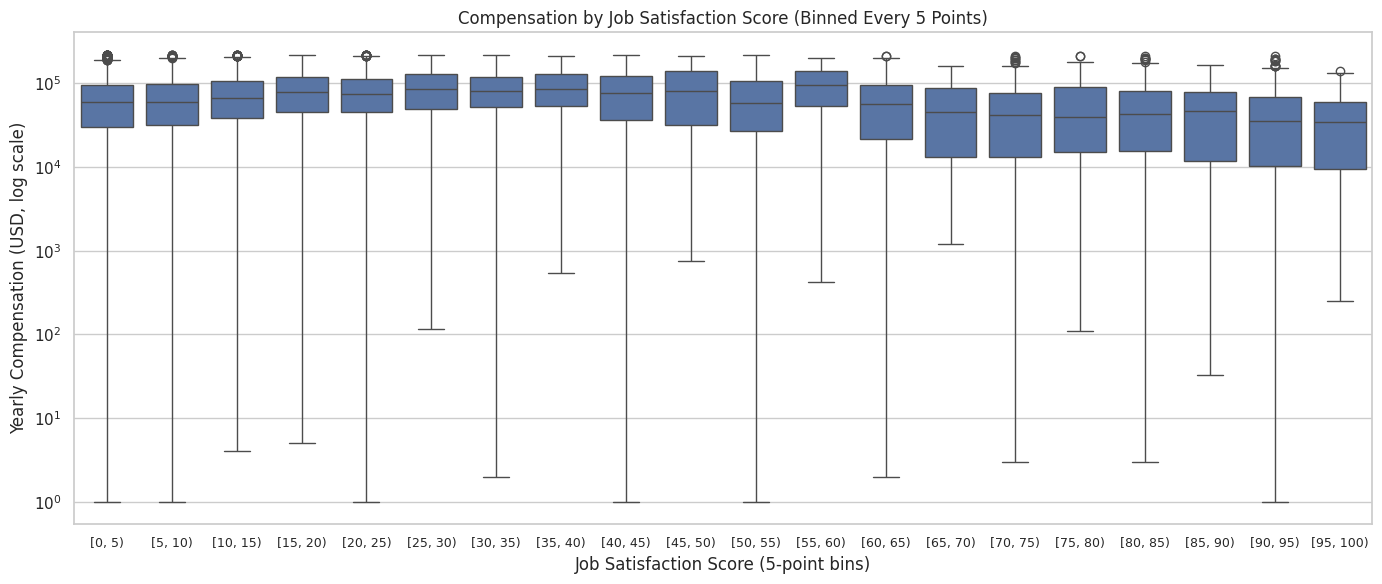

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins of width 2
df_no_outliers['JobsatBin'] = pd.cut(
    df_no_outliers['JobSatPoints_1'],
    bins=range(0, 105, 5),  # 0 to 100 inclusive, step = 5
    right=False,
    include_lowest=True
)

# Drop missing bins if any
binned_df = df_no_outliers.dropna(subset=['JobsatBin'])

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=binned_df, x='JobsatBin', y='ConvertedCompYearly')
plt.yscale('log')
plt.xticks(rotation=0, ha='center', fontsize=9)
plt.title('Compensation by Job Satisfaction Score (Binned Every 5 Points)')
plt.xlabel('Job Satisfaction Score (5-point bins)')
plt.ylabel('Yearly Compensation (USD, log scale)')
plt.tight_layout()
plt.show()


### **Insights from the Binned Job Satisfaction vs Compensation Plot**

#### 1. **Median compensation remains relatively steady**

* The median compensation across bins appears fairly flat, especially between satisfaction scores **30 to 85**.
* This aligns with the **correlation coefficient \~ -0.06** — little to no linear relationship.

#### 2. **Compensation spread narrows at higher satisfaction scores**

* In bins above **80–85**, the range of compensation appears **tighter** and slightly **elevated** at the lower bound.
* This may suggest that **extremely satisfied workers are less likely to be low-paid**, though high pay isn't a guarantee of high satisfaction.

#### 3. **High satisfaction exists across a wide pay range**

* Even the **95–100 bin** contains a few lower earners, indicating that **non-monetary factors** may play a big role in job satisfaction — e.g., meaningful work, work-life balance, autonomy, etc.

#### 4. **Some bins show more volatility**

* Certain mid-range bins (e.g., 25–35) have wider IQRs and more outliers, suggesting greater disparity in how compensation and satisfaction interact for that group.

---

### Possible Interpretations

* **Job satisfaction isn't primarily driven by salary** — or at least, not linearly. There may be **thresholds** (e.g. above poverty or regional averages) where money matters less.
* **Highly paid, dissatisfied individuals do exist**, especially in the 0–20 bins. This could reflect burnout, misalignment with role, or poor workplace culture.
* **Very low-paid individuals rarely report high satisfaction**, possibly pointing to the importance of meeting basic needs first (Maslow-style).

---


### Summary of Compensation Analysis and Insights

In this analysis, we explored patterns in yearly compensation (`ConvertedCompYearly`) using cleaned and outlier-filtered survey data. The investigation proceeded through several steps:

#### Key Analyses Conducted
1. **Distribution of Compensation:**
   - A histogram and KDE plot (with log-scale) revealed that the distribution of yearly compensation is heavily right-skewed.
   - Quartiles were overlaid to highlight the central tendency and spread.

2. **Median Compensation for Full-Time Employees:**
   - After filtering for respondents with employment status "Employed, full-time," the median compensation was calculated.

3. **Compensation by Country:**
   - A box plot compared compensation distributions across the 10 most represented countries.
   - Results showed significant regional variation, with the USA showing a higher median and broader spread.

4. **Correlation Analysis:**
   - Correlation coefficients between `ConvertedCompYearly`, `WorkExp`, and `JobsatPoints_1` revealed:
     - Moderate positive correlation with `WorkExp` (r ≈ 0.41)
     - Very weak or negligible correlation with `JobsatPoints_1` (job satisfaction)

5. **Compensation vs Experience and Satisfaction:**
   - Scatter plots showed considerable vertical overlap, prompting the use of box plots instead.
   - Box plots of compensation by work experience revealed a gradual increase in median compensation with more years of experience.
   - Box plots of compensation by binned job satisfaction (5-point intervals) showed a largely flat median but a slightly narrower range at higher satisfaction levels.

####  Insights
- **Experience correlates with compensation**, as expected, though with diminishing returns after ~20 years.
- **Job satisfaction shows almost no linear correlation** with compensation, but:
  - Extremely low satisfaction is rare among high earners.
  - Extremely high satisfaction tends to correspond with a narrower and slightly elevated compensation range.
- **High satisfaction exists across a wide compensation spectrum**, suggesting that non-monetary factors play a large role in perceived job satisfaction.

Overall, this analysis highlights that while experience is a reasonable predictor of pay, satisfaction is far more complex and not reliably linked to income alone.


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
